## **Project Description:**
**Exploring K-Means Clustering for Handwritten Digits**

This project investigates the K-Means clustering algorithm for classifying handwritten digits from the scikit-learn `load_digits` dataset.
**Methodology:**

- **Data Loading:** The script loads the `load_digits` dataset containing images of handwritten digits (0-9).
- **K-Means Implementation (Custom):**
    - A custom K-Means implementation is created using Python. 
    - It randomly selects `k` (number of clusters, set to 10 in this case) data points as initial centroids.
    - The script iterates for a predefined number of times (100 iterations here).
    - In each iteration:
        - Distances between each data point and all centroids are calculated using the Euclidean norm.
        - Each data point is assigned to the cluster with the closest centroid (represented by the label assignment).
        - The centroids are recomputed as the mean of the data points belonging to their respective clusters.
    - This process aims to minimize the sum of squared distances between data points and their assigned centroids (objective function).

**Outcomes:**

- **Visualization of Centroids:** After the final iteration, the script displays the centroids as images. These centroids represent the "prototypes" learned by the K-Means algorithm for each cluster.
- **Objective Function Analysis:** The script plots the objective function value (sum of squared distances) across all iterations. This visualization allows us to observe how the objective function decreases as the K-Means algorithm iterates and refines the cluster centroids. Ideally, the objective function should decrease or converge to a minimum value as the algorithm progresses.

**Interpretation:**

- The visualization of centroids helps understand the learned representations for each cluster. Ideally, these centroids should resemble the "average" digit within their corresponding clusters.
- The objective function plot demonstrates how the K-Means algorithm optimizes the cluster configuration to minimize the distances between data points and their centroids.

**Further Exploration:**

- Implement K-Means using scikit-learn and compare the results with this custom implementation.
- Experiment with different values for `k` (number of clusters) and analyze the impact on clustering performance and objective function behavior.

This project provides a hands-on exploration of K-Means clustering for handwritten digits, offering insights into the algorithm's behavior through visualization and objective function analysis. 

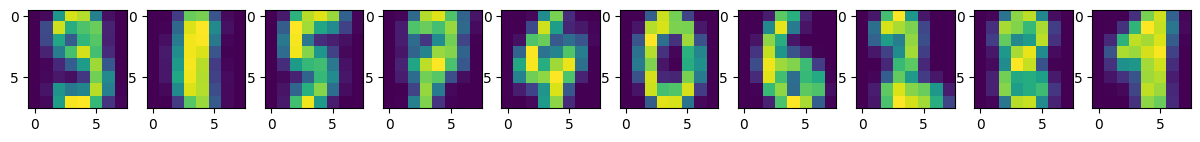

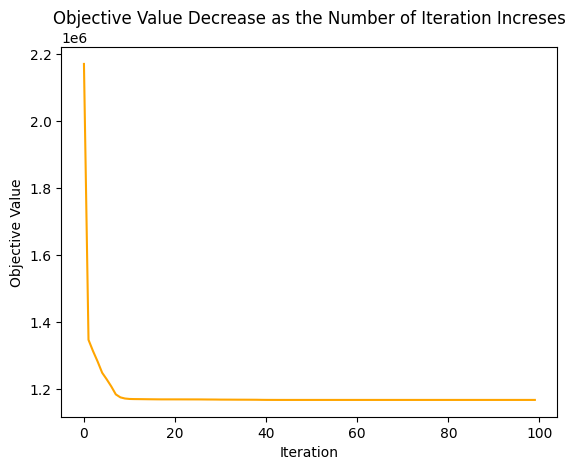

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digit=load_digits()
n,d=digit.data.shape
k=10
centroids=digit.data[np.random.choice(n,k,replace=False)]
objective=[]
iter=100
for i in range(iter):
    distances=np.zeros((n, k))
    for j in range(k):
        distances[:,j]=np.linalg.norm(digit.data - centroids[j],axis=1)
    labels=np.argmin(distances, axis=1)
    for j in range(k):
        centroids[j]=np.mean(digit.data[labels==j],axis=0)

    value=np.sum(distances[np.arange(n),labels]**2)
    objective.append(value)

#centroids as images
fig,ax=plt.subplots(1,10,figsize=(15,4))
for i,axi in enumerate(ax.flat):
    axi.imshow(centroids[i].reshape(8,8))
plt.show()
print()

#how the objective value behaves as number of iteration increase
plt.plot(objective,color="orange")
plt.title("Objective Value Decrease as the Number of Iteration Increses")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()